In [48]:
import numpy as np
import pandas as pd
from sklearn.datasets._samples_generator import make_blobs, make_moons
from sklearn.neighbors import NearestNeighbors
from math import dist
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

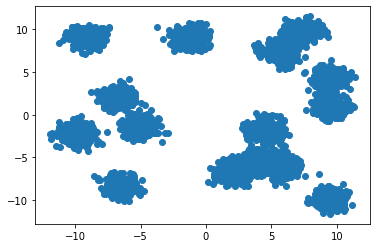

In [49]:
# X, y = make_blobs(n_samples=1000, centers=20, cluster_std=0.5, random_state=10)
X, y = make_blobs(n_samples=4000, centers=15, cluster_std=0.70, random_state=4)
# X, y = make_moons(n_samples=1000, noise=0.1)
plt.scatter(X[:, 0], X[:, 1])

In [50]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan',
          'navy', 'red', 'blue', 'green']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

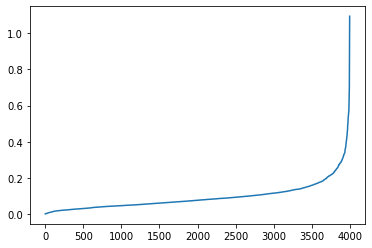

In [51]:
neigh = NearestNeighbors(n_neighbors=20)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

In [52]:
X

array([[-1.81202176,  9.50741584],
       [-4.75329207, -8.94410186],
       [10.19753606, -9.5022837 ],
       ...,
       [-8.65874866,  8.51217095],
       [ 5.29865408, -6.23178457],
       [-9.12669666,  9.41412304]])

In [53]:
distances

array([8.64101544e-04, 8.64101544e-04, 1.61194112e-03, ...,
       1.01420809e+00, 1.05408685e+00, 1.09465608e+00])

In [54]:
diff = np.array([])
for key, value in enumerate(distances):
    if key != len(distances) - 1:
        diff = np.append(diff, abs(value - distances[key + 1]))

diffStd = diff.std()

for key, value in enumerate(diff):
    if value > 3 * diffStd:
        print(key)
        print(distances[key])
        eps = distances[key]
        print("***")
        break

3959
0.41203434472438044
***


In [55]:
m = DBSCAN(eps=eps, min_samples=20)
m.fit(X)

DBSCAN(eps=0.41203434472438044, min_samples=20)

In [56]:
clusters = m.labels_
clusters

array([ 0, -1,  1, ..., 11,  4, 11])

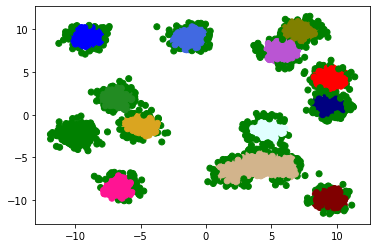

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(clusters))

In [58]:
cluster_value = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
cluster_value


,0,1,cluster
0,-1.812022,9.507416,0
1,-4.753292,-8.944102,-1
2,10.197536,-9.502284,1
3,-1.104805,8.320640,0
4,-7.535661,1.414008,2
...,...,...,...
3995,8.222744,9.713103,6
3996,10.148802,5.367336,-1
3997,-8.658749,8.512171,11
3998,5.298654,-6.231785,4


In [59]:
def calculate_member_core_point(cluster_values, cluster_number):
    core_point_arrays = cluster_values.groupby('cluster').get_group(cluster_number).drop('cluster', axis=1).to_numpy()
    core_points = dict()
    for pi in core_point_arrays:
        point = 0
        for pj in core_point_arrays:
            if dist(pi, pj) < eps:
                point += 1
        core_points[point] = pi
    return core_points

# dens_value = dict(sorted(calculate_member_core_point(cluster_value, 0).items(), reverse=True))
# dens_value

In [60]:
def find_center_point(point1, point2):
    n = len(point1)
    result = [0 for i in range(n)]
    for i in range(n):
        result[i] = (point1[i] + point2[i]) / 2
    return [result[i] for i, v in enumerate(result)]

In [61]:
find_center_point([5, 3, 4], [2, 7, 6])

[3.5, 5.0, 5.0]

In [62]:
def compress_data(dens_values):
    final_point = []
    not_check = []
    iterate = 0
    middlePoint = []
    for kpi, pi in dens_values.items():
        middlePoint = pi
        dens = 0
        continues = 0
        for key, check in enumerate(not_check):
            if (pi == check).all():
                continues = 1
                break
        if continues == 1:
            continue
        for kpj, pj in dens_values.items():
            if (dist(middlePoint, pj) < eps and dist(middlePoint, pj) != 0):
                middlePoint = find_center_point(middlePoint, pj)
                not_check.append(pj)
                dens += 1
        print(dens)
        middlePoint = np.append(middlePoint, dens)
        final_point.append(np.ndarray.tolist(np.array(middlePoint)))
    return final_point

In [63]:
all_data = []
for i in range(m.labels_.max() + 1):
    dens_value = dict(sorted(calculate_member_core_point(cluster_value, i).items(), reverse=True))
    all_data.append(compress_data(dens_value))

result = []
for i, vi in enumerate(all_data):
    for j, vj in enumerate(vi):
        result.append(vj)

result

10
11
10
0
3
4
1
4
2
1
0
2
0
11
10
10
12
5
10
4
9
3
7
3
3
2
2
0
7
8
8
8
8
10
5
6
9
6
4
5
3
0
0
0
2
0
6
4
7
6
8
7
3
7
5
4
1
1
0
2
0
0
7
6
8
0
4
5
0
1
1
0
5
0
0
0
4
0
0
1
2
3
0
0
0
0
0
0
10
2
2
10
6
4
1
0
4
3
1
0
0
12
0
9
6
13
6
0
0
15
6
15
1
15
15
4
4
7
3
3
3
0
4
0
9
10
10
9
10
10
8
9
10
13
10
4
6
4
1
2
3
0
2
3
0
13
9
12
12
14
14
14
14
6
4
7
8
5
4
3
3
2
0
0
3
14
3
14
5
14
5
1
4
4
1
5
3
0
3
4
2
0
5
3
2
5
9
4
3
9
5
6
6
1
0
1
3
2
2
7
8
7
9
1
4
3
6
6
7
4
2
2
0
2
1
3
2


[[-1.5088269304682624, 9.379253575066176, 10.0],
 [-1.5090010921954833, 9.379196506075147, 11.0],
 [-1.5090389828761201, 9.37884763776552, 10.0],
 [-0.9461304462941487, 9.326014232823825, 0.0],
 [-0.8153939187947838, 10.05126356191879, 3.0],
 [-1.5618314714738517, 8.056943934107693, 4.0],
 [-1.1573576707769657, 8.48770596798883, 1.0],
 [-2.2623296902323373, 8.95487814173136, 4.0],
 [-0.2688487553525773, 9.069009970245283, 2.0],
 [-2.116914809367497, 9.717471792945354, 1.0],
 [-0.406548393577551, 8.429903302355024, 0.0],
 [-0.7608537527261583, 7.857386647519585, 2.0],
 [-2.357885488168451, 8.19676417303926, 0.0],
 [9.150277399493342, -9.413163893918071, 11.0],
 [9.150727301568896, -9.413448911537262, 10.0],
 [9.150901460385027, -9.413345221471214, 10.0],
 [9.150230149100683, -9.413242250483462, 12.0],
 [10.02486933335814, -9.814290714142672, 5.0],
 [9.150379871033621, -9.413753942574441, 10.0],
 [9.459971806369488, -10.622280260761169, 4.0],
 [8.585929211504915, -10.023284368450527, 9.0

In [64]:
arrays_dens = np.array(result)
arrays_dens

array([[ -1.50882693,   9.37925358,  10.        ],
       [ -1.50900109,   9.37919651,  11.        ],
       [ -1.50903898,   9.37884764,  10.        ],
       [ -0.94613045,   9.32601423,   0.        ],
       [ -0.81539392,  10.05126356,   3.        ],
       [ -1.56183147,   8.05694393,   4.        ],
       [ -1.15735767,   8.48770597,   1.        ],
       [ -2.26232969,   8.95487814,   4.        ],
       [ -0.26884876,   9.06900997,   2.        ],
       [ -2.11691481,   9.71747179,   1.        ],
       [ -0.40654839,   8.4299033 ,   0.        ],
       [ -0.76085375,   7.85738665,   2.        ],
       [ -2.35788549,   8.19676417,   0.        ],
       [  9.1502774 ,  -9.41316389,  11.        ],
       [  9.1507273 ,  -9.41344891,  10.        ],
       [  9.15090146,  -9.41334522,  10.        ],
       [  9.15023015,  -9.41324225,  12.        ],
       [ 10.02486933,  -9.81429071,   5.        ],
       [  9.15037987,  -9.41375394,  10.        ],
       [  9.45997181, -10.62228

In [65]:
new_dens = arrays_dens[np.where(arrays_dens[:, len(arrays_dens[0, :]) - 1] >= 1)]
new_dens

array([[ -1.50882693,   9.37925358,  10.        ],
       [ -1.50900109,   9.37919651,  11.        ],
       [ -1.50903898,   9.37884764,  10.        ],
       [ -0.81539392,  10.05126356,   3.        ],
       [ -1.56183147,   8.05694393,   4.        ],
       [ -1.15735767,   8.48770597,   1.        ],
       [ -2.26232969,   8.95487814,   4.        ],
       [ -0.26884876,   9.06900997,   2.        ],
       [ -2.11691481,   9.71747179,   1.        ],
       [ -0.76085375,   7.85738665,   2.        ],
       [  9.1502774 ,  -9.41316389,  11.        ],
       [  9.1507273 ,  -9.41344891,  10.        ],
       [  9.15090146,  -9.41334522,  10.        ],
       [  9.15023015,  -9.41324225,  12.        ],
       [ 10.02486933,  -9.81429071,   5.        ],
       [  9.15037987,  -9.41375394,  10.        ],
       [  9.45997181, -10.62228026,   4.        ],
       [  8.58592921, -10.02328437,   9.        ],
       [  9.75521409, -10.53311158,   3.        ],
       [  8.63345327,  -9.09490

In [66]:
zero_dens = arrays_dens[np.where(arrays_dens[:, len(arrays_dens[0, :]) - 1] < 1)]
zero_dens

array([[-0.94613045,  9.32601423,  0.        ],
       [-0.40654839,  8.4299033 ,  0.        ],
       [-2.35788549,  8.19676417,  0.        ],
       [ 9.83808194, -8.64873237,  0.        ],
       [-6.78542174,  3.02870082,  0.        ],
       [-7.86174903,  2.35025838,  0.        ],
       [-6.18286663,  0.5686958 ,  0.        ],
       [-7.68983479,  1.05007001,  0.        ],
       [ 6.94555835,  6.96740603,  0.        ],
       [ 7.01860938,  7.56415624,  0.        ],
       [ 4.76624165,  8.34564667,  0.        ],
       [ 3.53357313, -5.92175362,  0.        ],
       [ 5.29865408, -6.23178457,  0.        ],
       [ 3.69895471, -5.24344958,  0.        ],
       [ 5.92247247, -6.19644123,  0.        ],
       [ 5.58294461, -6.93784629,  0.        ],
       [ 5.98017774, -5.30849539,  0.        ],
       [ 3.18216103, -5.2167876 ,  0.        ],
       [ 4.37808577, -6.84056824,  0.        ],
       [ 1.270052  , -7.0389377 ,  0.        ],
       [ 2.35319447, -7.81164341,  0.   

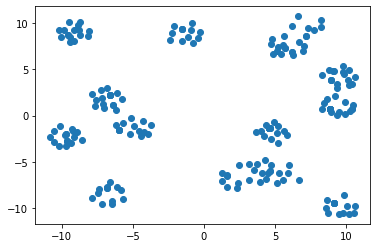

In [67]:
plt.scatter(arrays_dens[:, 0], arrays_dens[:, 1])

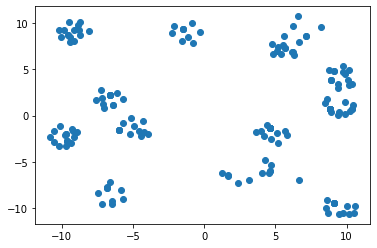

In [68]:
plt.scatter(new_dens[:, 0], new_dens[:, 1])

In [69]:
zero_dens_point = zero_dens[:, 0:len(zero_dens[0, :]) - 1]
zero_dens_point

array([[-0.94613045,  9.32601423],
       [-0.40654839,  8.4299033 ],
       [-2.35788549,  8.19676417],
       [ 9.83808194, -8.64873237],
       [-6.78542174,  3.02870082],
       [-7.86174903,  2.35025838],
       [-6.18286663,  0.5686958 ],
       [-7.68983479,  1.05007001],
       [ 6.94555835,  6.96740603],
       [ 7.01860938,  7.56415624],
       [ 4.76624165,  8.34564667],
       [ 3.53357313, -5.92175362],
       [ 5.29865408, -6.23178457],
       [ 3.69895471, -5.24344958],
       [ 5.92247247, -6.19644123],
       [ 5.58294461, -6.93784629],
       [ 5.98017774, -5.30849539],
       [ 3.18216103, -5.2167876 ],
       [ 4.37808577, -6.84056824],
       [ 1.270052  , -7.0389377 ],
       [ 2.35319447, -7.81164341],
       [ 1.62584645, -7.7523222 ],
       [ 2.45412802, -5.32815669],
       [ 3.91951795, -7.14957942],
       [ 5.12848225, -7.27369158],
       [-6.09677598, -7.72021424],
       [-7.84483949, -8.88063786],
       [-7.36639671, -7.9215389 ],
       [ 7.32578803,

In [70]:
delete_values = []
for key, value in enumerate(X):
    for zkey, zval in enumerate(zero_dens_point):
        if dist(zval, value) < eps:
            delete_values.append(value)

remain_values = []
for key, value in enumerate(X):
    length = 0
    for dkey, dval in enumerate(delete_values):
        if (dval != value).all():
            length += 1
    if length == len(delete_values):
        remain_values.append(value)
remain_values = np.array(remain_values)
remain_values

array([[-1.81202176,  9.50741584],
       [-4.75329207, -8.94410186],
       [10.19753606, -9.5022837 ],
       ...,
       [10.14880249,  5.36733646],
       [-8.65874866,  8.51217095],
       [-9.12669666,  9.41412304]])

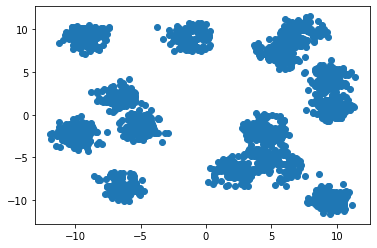

In [71]:
plt.scatter(remain_values[:, 0], remain_values[:, 1])

In [72]:
# neigh = NearestNeighbors(n_neighbors=5)
# nbrs = neigh.fit(remain_values)
# distances, indices = nbrs.kneighbors(remain_values)
# distances = np.sort(distances, axis=0)
# distances = distances[:, 1]
# plt.plot(distances)

In [73]:
# diff = np.array([])
# for key, value in enumerate(distances):
#     if key != len(distances) - 1:
#         diff = np.append(diff, abs(value - distances[key + 1]))
#
# diffStd = diff.std()
#
# for key, value in enumerate(diff):
#     if value > 4 * diffStd:
#         print(key)
#         print(distances[key])
#         eps = distances[key]
#         print("***")
#         break

In [74]:
m = DBSCAN(eps=eps, min_samples=20)
m.fit(remain_values)

DBSCAN(eps=0.41203434472438044, min_samples=20)

In [75]:
final_db_cluster = m.labels_
final_db_cluster

array([ 0, -1,  1, ..., -1, 10, 10])

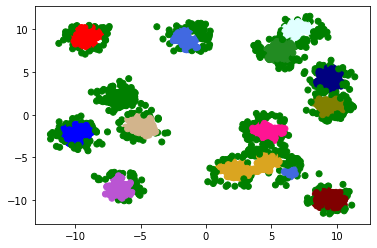

In [76]:
plt.scatter(remain_values[:, 0], remain_values[:, 1], c=vectorizer(final_db_cluster))

In [77]:
dens_cluster_value = pd.concat([pd.DataFrame(remain_values), pd.DataFrame(final_db_cluster, columns=['cluster'])],
                               axis=1)
dens_cluster_value

,0,1,cluster
0,-1.812022,9.507416,0
1,-4.753292,-8.944102,-1
2,10.197536,-9.502284,1
3,-1.104805,8.320640,0
4,-7.700909,8.717212,-1
...,...,...,...
3401,-9.259876,10.201763,10
3402,8.222744,9.713103,-1
3403,10.148802,5.367336,-1
3404,-8.658749,8.512171,10


In [78]:
def find_center_point_cluster(cluster_values, cluster_number):
    center_points = []
    for i in range(cluster_number):
        mid_point = []
        denses = cluster_values.groupby('cluster').get_group(i).drop('cluster', axis=1).to_numpy()
        for key, value in enumerate(denses):
            if key == 0:
                mid_point = value
            if (key != len(denses)):
                mid_point = find_center_point(mid_point, value)
        center_points.append(mid_point)
    return center_points

center_point =find_center_point_cluster(dens_cluster_value, max(final_db_cluster) + 1)

In [79]:
center_point = np.array(center_point)
center_point

array([[-1.73507441,  9.1768647 ],
       [ 9.24343576, -9.85064702],
       [ 6.08517186,  7.58762881],
       [-6.18054413, -8.00306465],
       [-4.9743893 , -1.05508524],
       [ 4.58746278, -1.99607824],
       [ 9.63532555,  0.78052592],
       [ 3.80986856, -5.70721343],
       [ 7.17048117,  9.96030222],
       [ 9.51775672,  4.79739457],
       [-9.02337703,  9.25714604],
       [-9.82678419, -2.38264091],
       [-6.36246775,  1.97124862],
       [ 6.49041934, -6.76710206]])

In [80]:
kmeans = KMeans(n_clusters=len(center_point), init=center_point, n_init=1)
kmeans.fit(X)
k_clusters = kmeans.labels_
k_clusters

array([ 0,  3,  1, ..., 10, 13, 10], dtype=int32)

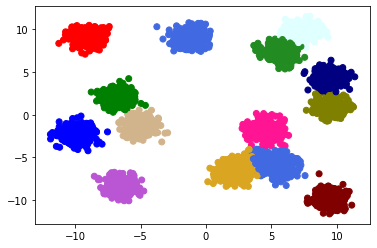

In [81]:
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(k_clusters))